# Clustering Practices
This is a Thinkful practice for Data Sciecne program Unit 4 Lesson 2. For this practice, I will be makeing 4 different random datasets using make_blobs from SK-Learn. For each dataset, I will run 4 different clustering methods, including 𝑘 -means, mean shift, spectral clustering and affinity propagation. At the end, will discuss how these 4 different clustering methods perform on each dataset. 

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Blob_1
Same dataset from course material. 

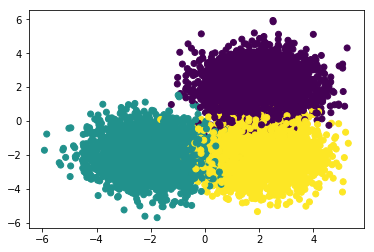

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers for blob1
centers_1 = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_1, Y_1 = make_blobs(
    n_samples=10000,
    centers=centers_1,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X_1[:, 0], X_1[:, 1], c=Y_1)
plt.show()

#Divide into training and test sets.
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(
    X_1,
    Y_1,
    test_size=0.3,
    random_state=42)

In [0]:
from sklearn.cluster import KMeans
Y_pred_Kmean_1 = KMeans(n_clusters=3, random_state=42).fit_predict(X_1)

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth_1 = estimate_bandwidth(X_1, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms_1 = MeanShift(bandwidth=bandwidth_1, bin_seeding=True, n_jobs=-1)
ms_1.fit(X_1)

MeanShift(bandwidth=1.8733299071539335, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=-1, seeds=None)

In [0]:
from sklearn.cluster import SpectralClustering
sc_1 = SpectralClustering(n_clusters=3, n_jobs=-1)
sc_1.fit(X_1)
Y_pred_sc_1=sc_1.fit_predict(X_1)

In [0]:
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import AffinityPropagation

af_1 = AffinityPropagation().fit(X_1)

cluster_centers_indices_1 = af_1.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices_1)
labels_1 = af_1.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 5651


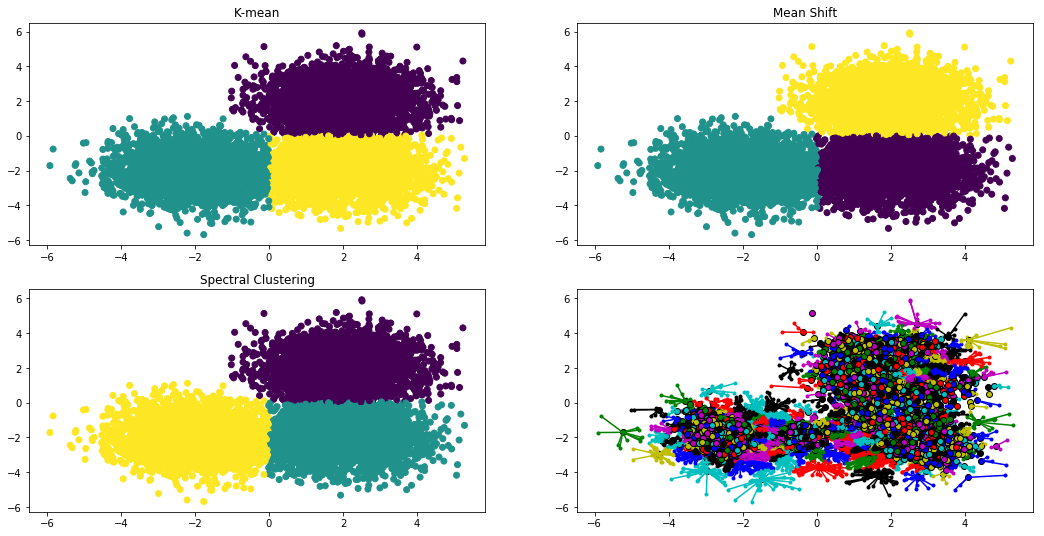

In [0]:
plt.figure(figsize=(18, 9))

plt.subplot(221)
plt.scatter(X_1[:, 0], X_1[:, 1], c=Y_pred_Kmean_1)
plt.title('K-mean')

plt.subplot(222)
plt.scatter(X_1[:, 0], X_1[:, 1], c=ms_1.labels_)
plt.title('Mean Shift')

plt.subplot(223)
plt.scatter(X_1[:, 0], X_1[:, 1], c=Y_pred_sc_1)
plt.title('Spectral Clustering')

plt.subplot(224)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_1 == k
    cluster_center = X_1[cluster_centers_indices_1[k]]
    plt.plot(X_1[class_members, 0], X_1[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_1[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

According to above graphic, we can see that using K-mean and Spectral Clustering return back similar clusters compare to our original data. For Mean Shift clustering method, the two clusters on the right seems swithced positions. For Affinity Propagation, it returns back more than 5k clusters. From my understanding, I think this is overfitting the data. 

## Blob_2

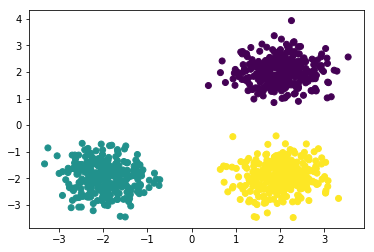

In [0]:
# The coordinates of the centers for blob2
centers_2 = [[2, 2], [-2, -2], [2, -2]]

# Make 10,00 rows worth of data with two features representing three
# clusters, each having a standard deviation of 0.5.
X_2, Y_2 = make_blobs(
    n_samples=1000,
    centers=centers_2,
    cluster_std=0.5,
    n_features=2,
    random_state=42)

plt.scatter(X_2[:, 0], X_2[:, 1], c=Y_2)
plt.show()

#Divide into training and test sets.
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(
    X_2,
    Y_2,
    test_size=0.3,
    random_state=42)

In [0]:
# K-mean
Y_pred_Kmean_2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_2)

#Mean-Shift
bandwidth_2 = estimate_bandwidth(X_2, quantile=0.2, n_samples=500)
ms_2 = MeanShift(bandwidth=bandwidth_2, bin_seeding=True, n_jobs=-1)
ms_2.fit(X_2)

#Spectral Clustering
sc_2 = SpectralClustering(n_clusters=3, n_jobs=-1)
sc_2.fit(X_2)
Y_pred_sc_2=sc_2.fit_predict(X_2)

#Affinity Propagation
af_2 = AffinityPropagation().fit(X_2)
cluster_centers_indices_2 = af_2.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices_2)
labels_2 = af_2.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 114


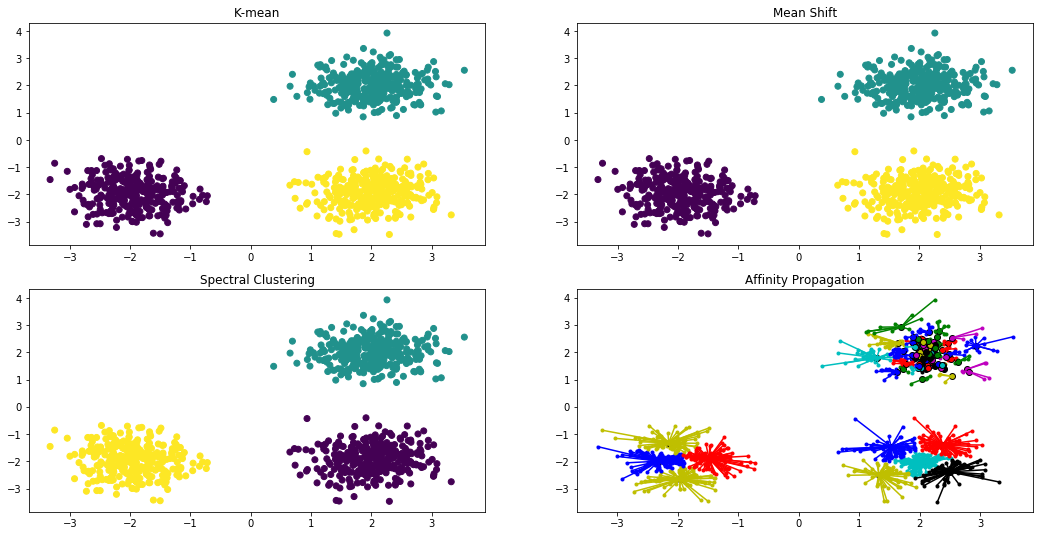

In [0]:
plt.figure(figsize=(18, 9))

plt.subplot(221)
plt.scatter(X_2[:, 0], X_2[:, 1], c=Y_pred_Kmean_2)
plt.title('K-mean')

plt.subplot(222)
plt.scatter(X_2[:, 0], X_2[:, 1], c=ms_2.labels_)
plt.title('Mean Shift')

plt.subplot(223)
plt.scatter(X_2[:, 0], X_2[:, 1], c=Y_pred_sc_2)
plt.title('Spectral Clustering')

plt.subplot(224)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_2 == k
    cluster_center = X_2[cluster_centers_indices_2[k]]
    plt.plot(X_2[class_members, 0], X_2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_2[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        plt.title('Affinity Propagation')
plt.show()

For smaller sample size, it seems like K-mean, Mean Shift, and Spectral Clustering are able to identify clusters relatively well. However, for Affinity Propagation, the number of identified clusters decreased, which make senses here because we have less data points, and most of the clusters are focus on the upper right group. 

## Blob_3

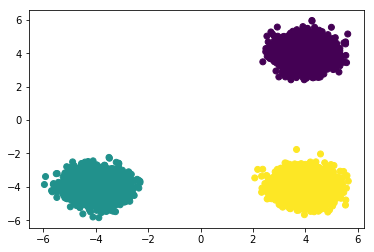

In [0]:
# The coordinates of the centers for blob3
centers_3 = [[4, 4], [-4, -4], [4, -4]]

# Make 10000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 0.5.
X_3, Y_3 = make_blobs(
    n_samples=10000,
    centers=centers_3,
    cluster_std=0.5,
    n_features=2,
    random_state=42)

plt.scatter(X_3[:, 0], X_3[:, 1], c=Y_3)
plt.show()

#Divide into training and test sets.
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(
    X_3,
    Y_3,
    test_size=0.3,
    random_state=42)

In [0]:
# K-mean
Y_pred_Kmean_3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_3)

#Mean-Shift
bandwidth_3 = estimate_bandwidth(X_3, quantile=0.2, n_samples=500)
ms_3 = MeanShift(bandwidth=bandwidth_3, bin_seeding=True, n_jobs=-1)
ms_3.fit(X_3)

#Spectral Clustering
sc_3 = SpectralClustering(n_clusters=3, n_jobs=-1)
sc_3.fit(X_3)
Y_pred_sc_3=sc_3.fit_predict(X_3)

#Affinity Propagation
af_3 = AffinityPropagation().fit(X_3)
cluster_centers_indices_3 = af_3.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices_3)
labels_3 = af_3.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 6290


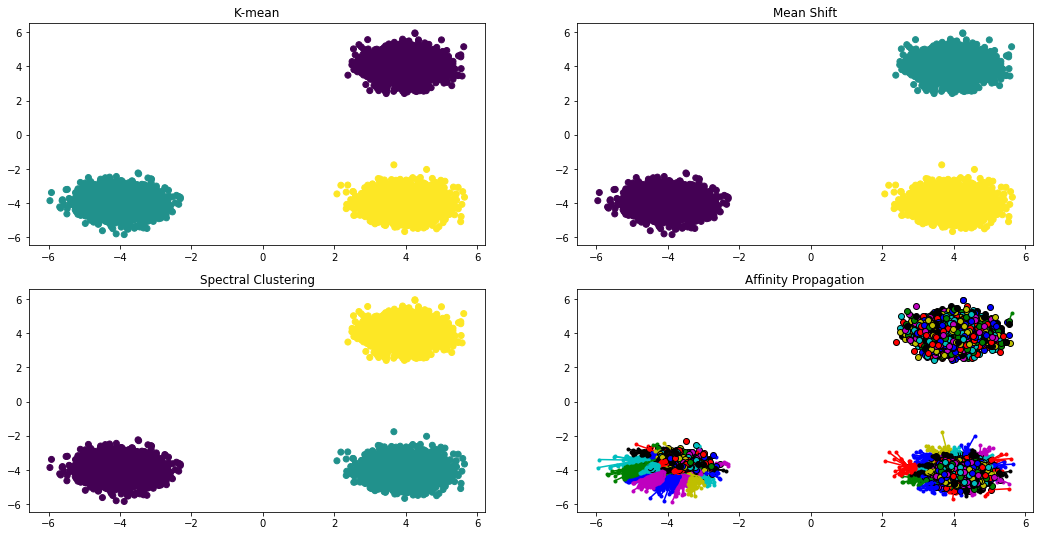

In [0]:
plt.figure(figsize=(18, 9))

plt.subplot(221)
plt.scatter(X_3[:, 0], X_3[:, 1], c=Y_pred_Kmean_3)
plt.title('K-mean')

plt.subplot(222)
plt.scatter(X_3[:, 0], X_3[:, 1], c=ms_3.labels_)
plt.title('Mean Shift')

plt.subplot(223)
plt.scatter(X_3[:, 0], X_3[:, 1], c=Y_pred_sc_3)
plt.title('Spectral Clustering')

plt.subplot(224)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_3 == k
    cluster_center = X_3[cluster_centers_indices_3[k]]
    plt.plot(X_3[class_members, 0], X_3[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_3[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        plt.title('Affinity Propagation')
plt.show()

## Blob_4

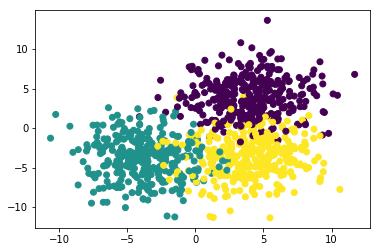

In [0]:
# The coordinates of the centers for blob3
centers_4 = [[4, 4], [-4, -4], [4, -4]]

# Make 10000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 0.5.
X_4, Y_4 = make_blobs(
    n_samples=1000,
    centers=centers_4,
    cluster_std=2.5,
    n_features=2,
    random_state=42)

plt.scatter(X_4[:, 0], X_4[:, 1], c=Y_4)
plt.show()

#Divide into training and test sets.
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(
    X_4,
    Y_4,
    test_size=0.3,
    random_state=42)

In [0]:
# K-mean
Y_pred_Kmean_4 = KMeans(n_clusters=3, random_state=42).fit_predict(X_4)

#Mean-Shift
bandwidth_4 = estimate_bandwidth(X_4, quantile=0.2, n_samples=500)
ms_4 = MeanShift(bandwidth=bandwidth_4, bin_seeding=True, n_jobs=-1)
ms_4.fit(X_4)

#Spectral Clustering
sc_4 = SpectralClustering(n_clusters=3, n_jobs=-1)
sc_4.fit(X_4)
Y_pred_sc_4=sc_4.fit_predict(X_4)

#Affinity Propagation
af_4 = AffinityPropagation().fit(X_4)
cluster_centers_indices_4 = af_4.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices_4)
labels_4 = af_4.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 30


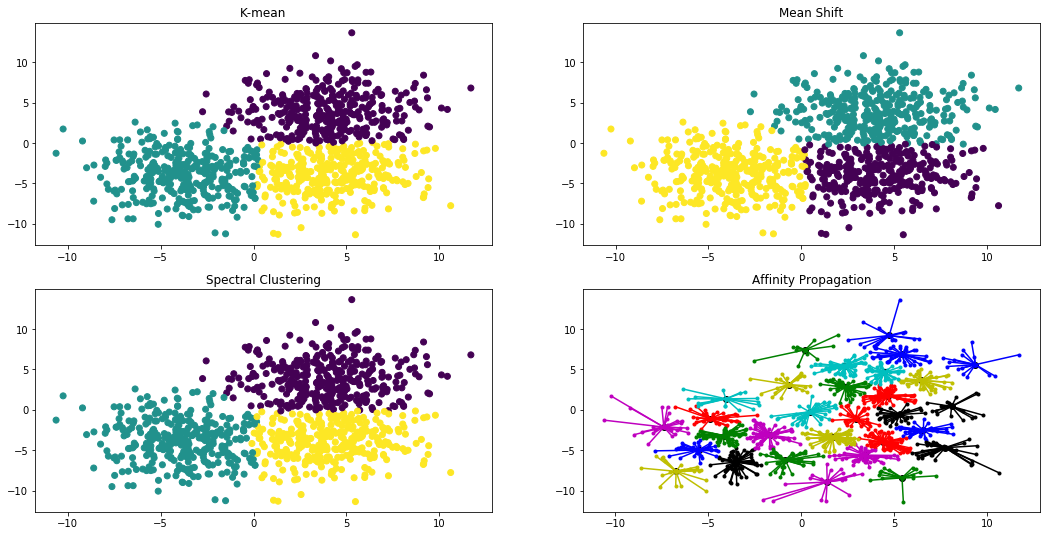

In [0]:
plt.figure(figsize=(18, 9))

plt.subplot(221)
plt.scatter(X_4[:, 0], X_4[:, 1], c=Y_pred_Kmean_4)
plt.title('K-mean')

plt.subplot(222)
plt.scatter(X_4[:, 0], X_4[:, 1], c=ms_4.labels_)
plt.title('Mean Shift')

plt.subplot(223)
plt.scatter(X_4[:, 0], X_4[:, 1], c=Y_pred_sc_4)
plt.title('Spectral Clustering')

plt.subplot(224)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_4 == k
    cluster_center = X_4[cluster_centers_indices_4[k]]
    plt.plot(X_4[class_members, 0], X_4[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_4[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        plt.title('Affinity Propagation')
plt.show()